# Regresión Polinomial 
#### Autor: Jose Luis Milan

In [2]:
#Importar los datos

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-bright')

df = pd.read_csv('..\data\manufacturing.csv')


<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
C:\Users\jluis\AppData\Local\Temp\ipykernel_43980\2990984267.py:8: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('..\data\manufacturing.csv')


In [9]:
# Visualizar primeros 5 registros
df.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


In [12]:
# Visualizar los información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


In [8]:
# Visualizar valores duplicados
df.loc[df.duplicated()]

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating


In [13]:
# Contar valores nulos en cada columna
df.isna().sum()

Temperature (°C)                  0
Pressure (kPa)                    0
Temperature x Pressure            0
Material Fusion Metric            0
Material Transformation Metric    0
Quality Rating                    0
dtype: int64

In [14]:
# Visualizar el tamaño de filas y columnas
df.shape

(3957, 6)

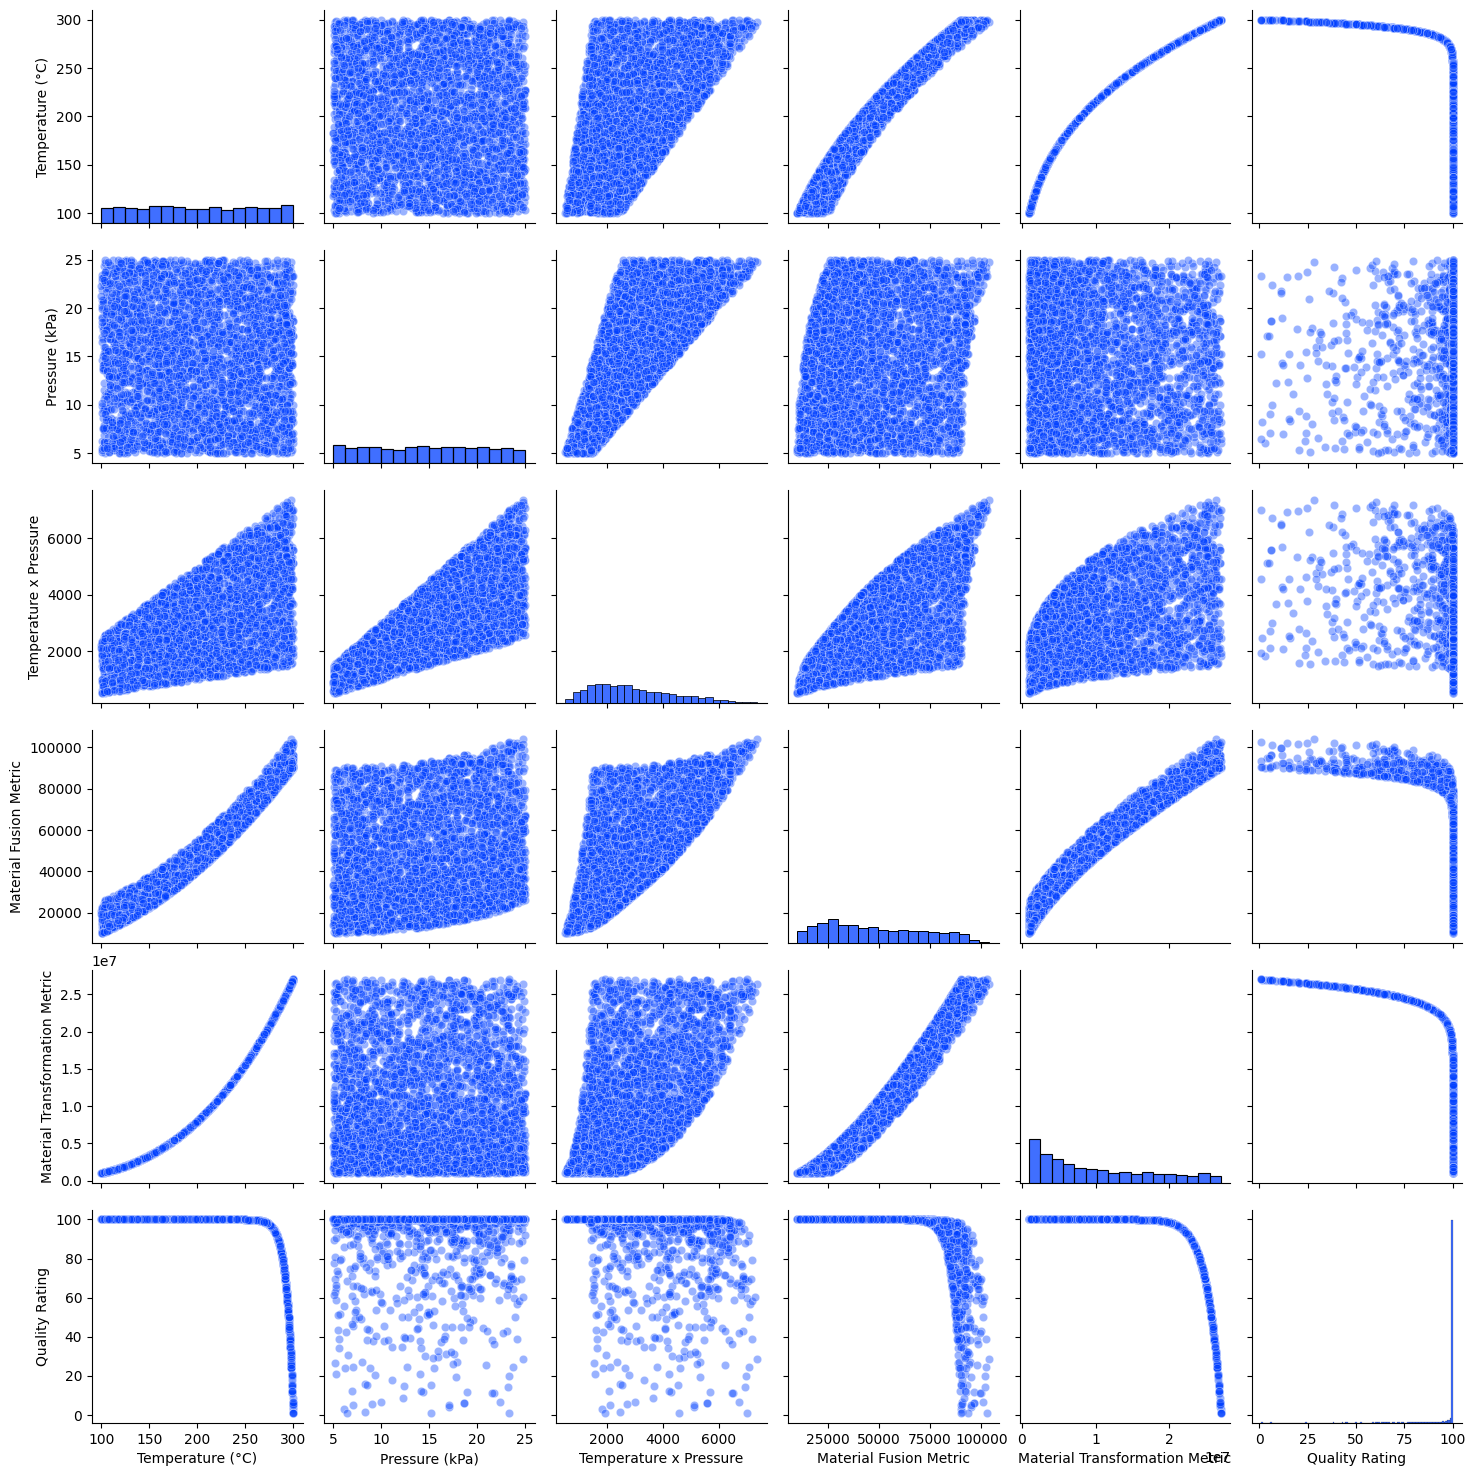

In [26]:
sns.pairplot(df, kind='scatter', plot_kws={'alpha':0.4})

In [21]:
# Definir la matriz de correlación
corr = df.corr()

<Axes: >

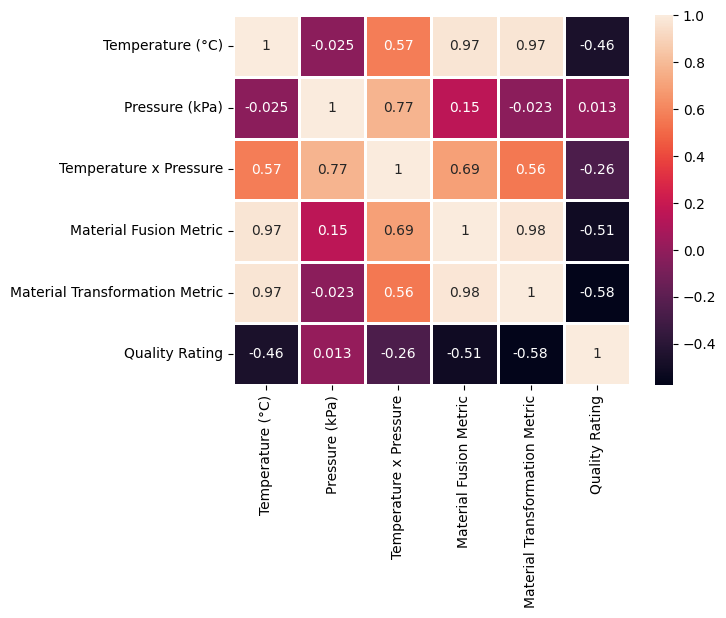

In [ ]:
# Visualizar la matriz de correlación
sns.heatmap(corr,annot=True, linewidth=0.8)

In [63]:
df.columns

Index(['Temperature (°C)', 'Pressure (kPa)', 'Temperature x Pressure',
       'Material Fusion Metric', 'Material Transformation Metric',
       'Quality Rating'],
      dtype='object')

In [92]:
# Implementar la regresión Polinomial

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Definir las varibles independientes y dependientes
x = df[['Temperature (°C)', 'Pressure (kPa)', 'Temperature x Pressure',
       'Material Fusion Metric', 'Material Transformation Metric']]
y = df['Quality Rating']


# Dividir los datos de prueba y entrenamiento
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Definir el grado del polinomio
poly_reg = PolynomialFeatures(degree=2)

# Escalado de los datos para mejorar la estabilización númerica
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Transformar las features existentes en features de mayor grado
x_train_poly = poly_reg.fit_transform(x_train_scaled)
x_test_poly = poly_reg.transform(x_test_scaled)

# Definir el modelo de regresión
model = LinearRegression()

# Entrenar el modelo
model.fit(x_train_poly, y_train)

# Predecir con los datos de prueba
y_pred = model.predict(x_test_poly)


In [93]:
# Error R^2
r2 = r2_score(y_test, y_pred)
# Error absoluto medio
mae = mean_absolute_error(y_test, y_pred)
# Error cuadratico medio
mse = mean_squared_error(y_test, y_pred)

print(f'Error R^2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')

Error R^2: 0.923482155339699
MAE: 2.480234591313789
MSE: 15.328837762756477
